# SPRAWOZDANIE ALGORYTM WSPINACZKI

## KATARZYNA JĘDROCHA   SZYMON BEDNAREK   MICHAŁ BARAN   BARTŁOMIEJ KALATA

### WSTĘP

Algorytm wspinaczkowy polega na wybraniu losowego X dla którego jest przypisana wartość Y. W pierwszej kolejności sprawdzane jest najbliższe sąsiedztwo X. Jeżeli wartość sąsiada jest większa niż wartość początkowego X wtedy sąsiadujący X jest brany jako punkt początkowy następnej iteracji algorytmu. W ten sposób możemy osiągnąć ekstremum fukcji minimalne lub maksymalne w zależności od założeń. Problem tego algorytmu polega na tym że znajdując się w wierzchołku fukncji kończymy działanie algorytmu. Jednakże nie zawsze osiągniąty wierzchołek jest ekstremum globalnym, tylko lokalnym. Aby zniwelować ten błąd należy uruchomić algorytm losując X, tyle razy, aby prawdopodobieństwo że otrzymany wynik jest ekstremum lokalnym było jak najmniejsze.

### OPIS KODU 

Nasz algorytm został napisany w języku Python. 

W pierwszej kolejności zdefiniowana została zmienna 'KR' która to jest wskaźnikiem jakości ułożenia zadań. Wartość 'KR' jest optymalizowana. Oznacza to że im mniejsza wartość 'KR' tym lepsze jest rozwiązanie problemu. 

TODO: OPIS PROBLEMU

Do przeszukiwania listy sąsiadów dla wylosowanego X, została stworzona funkcja get_neighbours(). Jej argumentami są :

    * **idx** - Jest to indeks dla ktorego szukamy sąsiadów.
    * **neighbours_count** - liczba sąsiadów którą chcemy wyszukać 
    * **df** - wprowadzone dane
    
Funkcja działa w następujący sposób:

Dla zadanych wartości argumentów algorytm ustawia się w pozycji startowej:

    Numer indeksu   | ... | n-4 | n-3 | n-2 | n-1 |  n  | n+1 | n+2 | n+3 | n+4 | ... |
    Sąsiedztwo      |  -  |  -  |  0  |  0  |  0  |  X  |  0  |  0  |  0  |  -  |  -  |
    
W powyższym przykładzie możemy zauważyć że dla zadanych:

    * idx = n;
    * neighbours_count = 6;
 
Algorytm ustawił się w pozycji n i wyszukał 6 sąsiadów.

Dla przypadków końca danych z lewej lub z prawej strony zostały stworzone wyjątki.
Wprowadzone zostały dodatkowe zmienne:
    
    * L - Jest to długość danych minus wylosowana pozycja
    * idx_prev = idx - Jest to indeks dla ktorego szukamy sasiadow
    * N_half - Połowa wartości szukanych sąsiadów
    
Zobrazowanie sytuacji w której występuje wyjątek:

    Numer indeksu |  0  |  1  | n=2 |  3  |  4  |  5  |  6  |  7  |  8  |  9  | ... |
    Sąsiedztwo    |  0  |  0  |  X  |  0  |  0  |  0  |  0  |  -  |  -  |  -  |  -  |
    
W powyższym przykładzie możemy zauważyć że dla zadanych:

    * idx = n = 2 gdzie n < neighbours_count/2;
    * neighbours_count = 6;

W takim przypadku możemy znaleźć tylko dwa obiekty z lewej strony, dlatego w tym wyjątku dodajemy dodatkowy obiekt z prawej strony. Sytuacja jest analogiczna dla obserwacji na obu końcach zbioru danych. Do rozwiązania tych wyjątków wykorzystany został następujący kod:

    if idx < N_half:
        idx = N_half
    
    elif idx > L - N_half:
        idx = L - N_half
    output = list(range(idx - N_half, idx + N_half + 1))

Jako ostateczny wynik funkcja zwraca listę sąsiadów, która zostanie przeszukana w celu uzyskania lepszego wyniku niz startowy X.

TODO: JAK ARGUMENTY TEJ FUNKCJI WPŁYWAJĄ NA ILOŚĆ ITERACJI

    

Ostateczna funkcja algorytmu to **hill_climbing_algorithm()**. Jednak do jej działania użyte zostały poszczególne pomniejsze funkcje:

    * calculate_improvements()
    * search_for_the_best_neighbour()
    * swap()
    * move()
    * plot_optimalization()

1. Funkcja **calculate_improvements()** jest odpowiedzialna za sprawdzenie jak zmieni się wartość **KR** w przypadku gdy zamienimy miejscami **idx** z jakimś sąsiadem.

2. Funkcja **search_for_the_best_neighbour()** jest odpowiedzialna za wyszukanie najlepszego sąsiada i przypisanie do zmiennej idx_min indeksu najmniejszego elementu.

3. Funkcja **swap()** jest odpowiedzialna za zamianę miejscami dwóch wierszy "in place" -  dzięki temu nie tworzymy nowej ramki danych. tylko pracujemy na tym samym zbiorze danych co optymalizuje szybkość wykonania algorytmu.

4. Funkcja **move()** jest odpowiedzialna za zmianę startowego X od którego zaczniemy kolejną iterację algorytmu.

5. Funkcja **plot_optimalization()** jest odpowiedzialna za wykonanie wykresu służącego do sprawdzenia czy algorytm poprawnie optymalizuje szukaną wartość.


### Funkcja hill_climbing_algorithm()

Do wykonania wlgorytmu wspinaczkowego dla wylosowanego X, została stworzona funkcja hill_climbing_algorithm(). Jej argumentami są:

    * number_of_iterations - ustalona liczba iteracji wykonania algorytmu
    * break_counter - ####################################################
    * neighbours_count - liczba sąsiadów którą chcemy wyszukać
    
Oraz ustawiamy dla poszczegołnych zmiennych punkt startowy:

    * idx - w pierwszej iteracji jest wybierany losowo jako jeden z indeksów zbioru danych.
    * improvements - zmienna ustalona jako pusty szereg numeryczny (wypełniony wartościami 0).
    * optimalization - przypisywana jest nazwa kolumny w zbiorze danych, którą posiłkuje się do wykonania wykresu.


In [2]:
np.random.seed(42)

def hill_climbing_algorithm(
    number_of_iterations = 1000, 
    break_counter = 10, 
    neighbours_count = 20
):
    optimalization = pd.DataFrame(columns=["Wartosc kombinacji"])
    improvements = np.zeros(neighbours_count)
    idx = np.random.randint(len(df))
    
    while number_of_iterations and break_counter:
        KR_before = get_KR() # początkowa wartość kombinacji
        neighbours = get_neighbours(idx, neighbours_count=neighbours_count) # lista sąsiadów
        # obliczanie potencjalnych ulepszeń dla sąsiadów
        calculate_improvements(KR_before, idx, neighbours, improvements)
        # wyszukanie sąsiada dla którego ulepszenie będzie największe
        best_neighbour = search_for_the_best_neighbour(neighbours, improvements)

        # jeżeli istnieje sąsiad po zamianie z którym ulepszymy kombinacje
        if best_neighbour:
            # zamiana miejscami z sąsiadem
            move(idx, best_neighbour)
            # obliczanie obecnej kombinacji
            KR_now = get_KR()
            # kolejna iteracja rozpoczyna się od miejsca na które wskoczył idx
            idx = best_neighbour  
            # dodawanie obecnej wartości kombinacji do listy wszystkich wartości
            optimalization = optimalization.append({
                "Wartosc kombinacji": KR_now
            }, ignore_index=True)

            number_of_iterations -= 1
        else:
            break_counter -= 1
            
    order = df["Zadanie"]
    
    return order, optimalization

NameError: name 'np' is not defined

In [28]:
new_order, new_optimalization = hill_climbing_algorithm(
    number_of_iterations=500,
    break_counter=20,
    neighbours_count=20
)

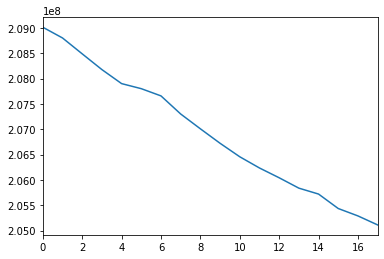

In [29]:
# działa ale bardzo słabo optymalizuje
plot_optimalization(new_optimalization)